# SESSION: Simulating time series signal and noise #3.27. Three important equations (sine, Gaussian, Euler's)

COURSE: Neural signal processing and analysis: Zero to hero

TEACHER: Mike X Cohen, sincxpress.com

**Goal:** Visualize data with Sine, Gaussian and Euler's functions

In [38]:
# Remember to always import first!

import matplotlib.pyplot as plt
import numpy as np

## Intution about Sine Waves

Text(0.5, 1.0, 'Sine Wave')

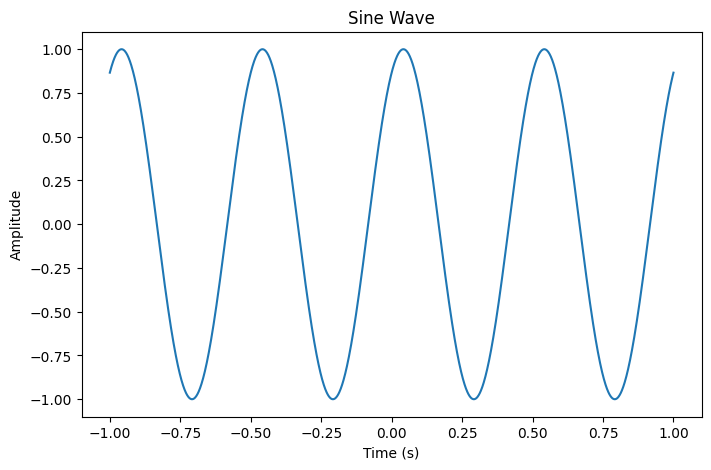

In [ ]:
# define parameters
freq = 2
srate = 1000
time = np.linspace(-1.000,1.000,num=srate*2) # time points from -1s to +1s, spaced apart by our sampling rate
ampl = 1
phas = np.pi/3

# create the sine wave
sinewave = np.multiply(ampl, np.sin(np.multiply(2*np.pi,np.multiply(freq,time))+phas))

# plot the sine wave
plt.figure(figsize=(8,5))
plt.plot(time,sinewave)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Sine Wave')

The sum of many sine waves can look like a complicated time series. Let's visualize this.

Text(0.5, 1.0, 'Summed Sine Waves')

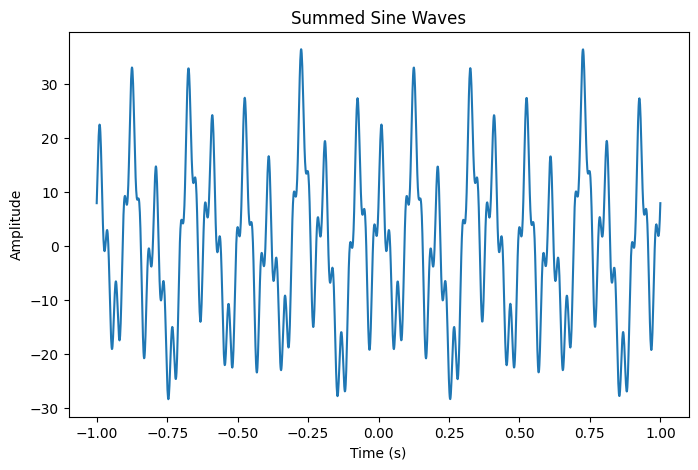

In [ ]:
# create many sine waves and sum them

srate = 1000 #sampling rate (for all the waves)
frex = [3,10,5,15,35] # a list of frequencies
amplit = [5,15,10,5,7] # a list of amplitudes (make sure this is the same length as the list of frequencies)
phases = [np.pi/7,np.pi/8,np.pi,np.pi/2,np.pi/-4] #phases between -pi and +pi
time = np.linspace(-1.000,1.000,num=srate*2) # time points from -1s to +1s, spaced apart by our sampling rate

# now, loop through the frequencies and create sine waves
sine_waves = np.ndarray((len(frex),len(time)))

for i in range(len(frex)):
  sine_waves[i, :] = np.multiply(amplit[i], np.sin(np.multiply(2*np.pi,np.multiply(frex[i],time))+phases[i]))

# plot the summed sine wave
plt.figure(figsize=(8,5))
plt.plot(time,sum(sine_waves))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Summed Sine Waves')


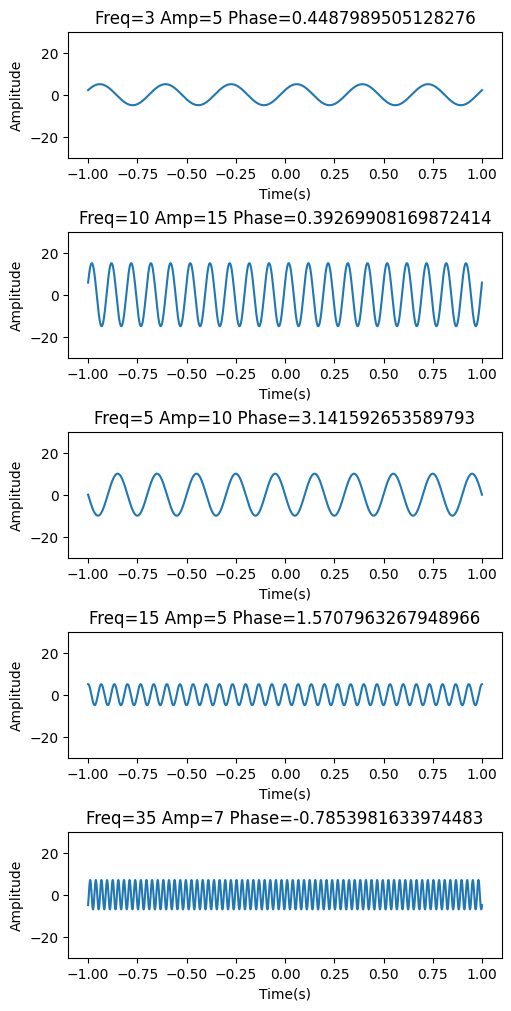

In [43]:
# plot each wave separately
fig,axes = plt.subplots(nrows = len(frex), layout = "constrained", figsize=(5,10))

for i in range(len(frex)):
  axes[i].plot(time,sine_waves[i])
  axes[i].set_title(f"Freq={frex[i]} Amp={amplit[i]} Phase={phases[i]}")
  axes[i].set_xlabel("Time(s)")
  axes[i].set_ylabel("Amplitude")
  axes[i].set_ylim((-max(amplit)*2, max(amplit)*2))


## Gaussian

22.449737392430613


Text(0.5, 1.0, 'Requested FWHM: 0.9, Actual FWHM:0.8984492246123059')

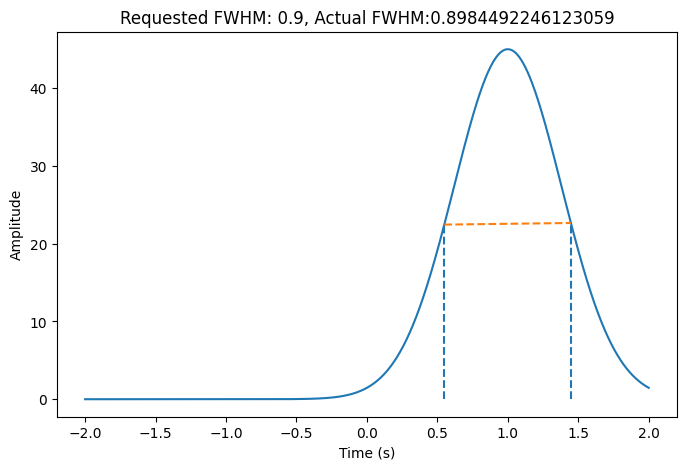

In [ ]:
# simulation parameters
time = np.linspace(-2.000,2.000,num=2000)
ptime = 1 # peak time
ampl = 45 # amplitude
fwhm = .9

# Gaussian equation
gwin = ampl*np.exp(-(4*(np.multiply(np.log(2),np.power(time-ptime,2)))) / (np.power(fwhm,2)))

def dsearchn(array,value):
  """approximation of MATLAB's dsearchn function, using numpy, https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array"""
  min_index = (np.abs(array-value)).argmin()
  return min_index

# empirical FWHM
gwinN = np.divide(gwin,max(gwin)) #this is the normalized version of gwin
midp = dsearchn(time,ptime)
pst5 = midp-1+dsearchn(gwinN[midp:],.5)
pre5 = dsearchn(gwinN[0:midp],.5)
empfwhm = time[pst5] - time[pre5]


print(gwin[pre5])
# plot the gaussian distribution
plt.figure(figsize=(8,5))
plt.plot(time,gwin) #the gaussian
plt.vlines(x=time[pre5],ymin=0, ymax=gwin[pre5], linestyle = '--') #min x of fwhm
plt.vlines(x=time[pst5],ymin=0, ymax=gwin[pst5], linestyle = '--') #max x of fwhm
plt.plot([time[pre5],time[pst5]],[gwin[pre5],gwin[pst5]], linestyle="--") #height of fwhm
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f'Requested FWHM: {fwhm}, Actual FWHM:{empfwhm}')
                

## Euler's Formula

Text(0.5, 1.0, 'Cartesian Plane')

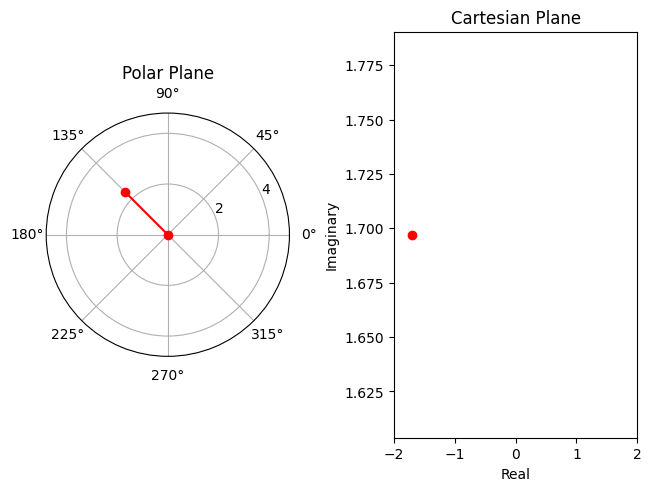

In [125]:
# simulation parameters
m = 2.4
k = 3*np.pi/4

# Euler's formula
meik = m*np.exp(1j*k)

# Plot Euler's formula
fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(
    [
        ["polar","cart"]
    ],
    per_subplot_kw=dict(polar=dict(projection="polar"))
)

ax_dict["polar"].plot([0,k], [0,m], "ro-")
ax_dict["polar"].set_rmax(m*2)
ax_dict["polar"].set_rticks([2,4])
ax_dict["polar"].set_title("Polar Plane")

ax_dict["cart"].plot(np.real(meik),np.imag(meik), "ro")
ax_dict["cart"].set_xlim((-2,2))
ax_dict["cart"].set_xlabel("Real")
ax_dict["cart"].set_ylabel("Imaginary")
ax_dict["cart"].set_title("Cartesian Plane")